# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; William Voigt.</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


*There are two classes in this model. The Animal-Agent Class is a class from which we make animal agents, which interact with other animal agents. Animal agents contain characteristics such as the size of their habitat, whether it is prey or predator, life span, gender, population carrying capacity, etc. Animals interact with each other, such that predator hunt prey, and animals mate with each other to procreate. The Environment class helps us visualize interactions with our animal agents by simulating the environment they live in using plots.*

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

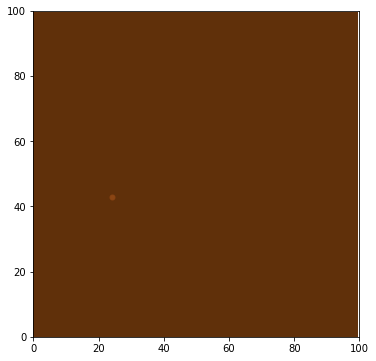

In [40]:
#Write your code here

import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data


class Animal_Agent():

    '''
    An Animal_Agent class. 
    '''
    
    def __init__(self,xmax=100,ymax=100,ptype="Prey",sex="M",age_limit=50,catch_radius=10,mate_range=5,gestation=8,shape="o",color="saddlebrown",saturation_pop=150):
        '''
        Initaliazes an animal agent object, an autonomous agent that can interact with other agents. Specifically, predators can hunt prey,
        prey can procreate, and both predator and prey can move around and age. 

        xmax (int): The (x) size of the habitat
        ymax (int): The (y) size of the habitat
        pytpe (string): Sets whether this is a predator or prey type of animal
        sex (string): Sets the sex of the animal
        age_limit (int): Sets the age at which the animal dies of old age
        catch_radius (int): Specifies how far away a predator can find/catch prey
        mate_range (int): Specifies how far away a prey can find a mate
        gestation (int): How long does an animal need to wait between mating cycles
        shape (string): Specifies the marker to use when visualizing the animal
        color (string): Specifies the color to use when visualizing the animal
        saturation_pop (int): The saturation population, where the environment can no longer support the prey
        is_caught (bool): Flag for determining whether prey has been caught by a predator
        '''
        self.x = random.randint(0, xmax)
        self.y = random.randint(0, ymax)
        self.age = 0 
        self.ptype = ptype
        self.age_limit = age_limit
        self.catch_radius = catch_radius
        self.xmax = xmax
        self.ymax = ymax
        self.sex = sex
        self.gestation = gestation
        self.last_litter_time = 1
        self.mate_range = mate_range 
        self.color = color
        self.shape = shape
        self.saturation_pop = saturation_pop
        self.is_caught = False

    def roaming(self,vx=7,vy=7): 
        '''
        Method to proceed random walk. Checks to make sure that the position it is trying to move into is within the bounds of 
        the environment. 
        '''
        dx = np.random.randint(-vx,vx)
        dy = np.random.randint(-vy,vy)

        if (self.x + dx > self.xmax) or (self.x + dx < 0):
            self.x -= dx
        else:
            self.x += dx

        if (self.y + dy > self.ymax) or (self.y + dy < 0):
            self.y -= dy
        else:
            self.y += dy
        # print(self.x,self.y)

    def set_allele(self, alle_d, alle_m):
        '''
        Method to set the alleles of this mouse: alle_d and alle_m from dad and mom, respectively.
        The values is either 0 or 1 for each allele. 
        0 and 1 are recessive and dominant gene expressions, respectively.
        This setup will result in three types of fur_color expressions: 
        type0 ==> (0,0): 0 = 0 + 0; recessive, dark color
        type1 ==> (0,1) or (1,0): 1 = 0 + 1 = 1 + 0; dominant, light color
        type2 ==> (1,1): 2 = 1 + 1; dominant, light color
        '''
        
        self.alle_d = alle_d
        self.alle_m = alle_m
        
        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95
            
        else:
            self.color = "saddlebrown" 


    def draw(self,ax):
        '''
        Method to draw the animal agent using an axis object ax.
        '''
        ax.scatter(self.x, self.y, s=24.0, c=self.color, marker=self.shape)   
    
    def aging(self):
        '''
        Method to increase the age of the animal agent by one.
        '''
        self.age += 1

    def check_if_dead(self):
        '''
        Method to check whether the animal agent has died of old age.
        '''
        if self.age > self.age_limit:
            return True
        else:
            return False


    def get_distance(self,agent):
        '''
        Get the distance between agents.

        agent (Animal_Agent): An animal agent object that we're finding the distance to.
        '''
        return math.sqrt((self.x-agent.x)**2 + (self.y-agent.y)**2)
    
    def hunt(self,all_agents):
        '''
        Method for a predator to find prey. If the predator finds prey, the method sets the is_caught flag 
        and returns the prey object so it can be removed from the environment. 


        all_agents (list): A list of all of the animal agent objects 
        '''
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius:
                    agent.is_caught = True
                    return agent       
        return False
    
    def procreate(self,all_agents,time):
        '''
        Method to create new agents (procreate). There are three barriers to procreation:
        1. Has it been enough time between the last procreation? (I.e., more than the gestation time.)
        2. Is there a (male) agent within range?
        3. Is the population below the saturation point? This is modeled as a logistic function.
        If all of these conditions are met, then a new litter is created. Every member of the new litter is 
        randomly assigned genes from their parents. The last litter time is set to the current time and the
        list of children is returned. 

        all_agents (list): A list of all of the animal agent objects 
        time (int): The current time, used to determine if the Animal Agent has passed the gestation period.
        '''
        
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time-self.last_litter_time),self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype=="Prey") and (agent.sex == "M") and (self.get_distance(agent) <= self.mate_range) and (val > (1.0/(1.0+np.exp(-len(all_agents)/self.saturation_pop)))):
                    child_num = int(np.random.normal(7,1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0,2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0,2) == 1:
                            dad_a = agent.alle_m               
                        child = Animal_Agent(sex="F")
                        if np.random.randint(0,2) == 1:
                            child = Animal_Agent(sex="M")
                        child.set_allele(dad_a,mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list
    
class Environment():

    '''
    An Environment class. 
    '''
    
    def __init__(self, xsize=100, ysize=100):
        self.xsize = xsize
        self.ysize = ysize
        self.environ = np.zeros((self.xsize,self.ysize,3))
        self.environ[:,:,0] = 0.38
        self.environ[:,:,1] = 0.19
        self.environ[:,:,2] = 0.04
        self.animal_agents = []

    
    def add_agent(self,agent):
        self.animal_agents.append(agent)
    
    def simulate(self,tot_time):
        for dt in range(tot_time):
            clear_output(wait=True)
            plt.figure(figsize=(6, 6))    
            plt.imshow(self.environ) 
            ax = plt.gca()   
            
            # loop over each animal
            temp_agents = []
            temp_hunted_agents = []
            for agent in self.animal_agents:
                agent.roaming()
                agent.draw(ax)
                
                if agent.ptype == "Prey":
                    agent.aging()
                    
                    if agent.check_if_dead():
                        del agent
                    else:
                        temp_agents.append(agent)
                        temp_new_agents = agent.procreate(self.animal_agents,dt)
                        if len(temp_new_agents) > 0:
                            temp_agents.extend(temp_new_agents)
                elif agent.ptype == "Predator":
                    caught_prey = agent.hunt(self.animal_agents)
                    if caught_prey:
                        temp_hunted_agents.append(caught_prey)
                    temp_agents.append(agent)
            
            for agent in temp_hunted_agents:
                temp_agents.remove(agent)        
            self.animal_agents.clear
            self.animal_agents = temp_agents
            plt.xlim(0,self.xsize)
            plt.ylim(0,self.ysize)
            plt.show()   
            time.sleep(0.001)      

    def simulate_plot_populations(self,tot_time):
        self.light_brown_animals = []
        self.dark_brown_animals = []
        self.times = []
        for dt in range(tot_time):
            
            # loop over each animal agent
            temp_agents = []
            temp_hunted_agents = []
            for agent in self.animal_agents:
                agent.roaming()
                
                if agent.ptype == "Prey":
                    agent.aging()
                    
                    if agent.check_if_dead():
                        del agent
                    else:
                        temp_agents.append(agent)
                        temp_new_agents = agent.procreate(self.animal_agents, dt)
                        if len(temp_new_agents) > 0:
                            temp_agents.extend(temp_new_agents)
                elif agent.ptype == "Predator":
                    caught_prey = agent.hunt(self.animal_agents)
                    if caught_prey:
                        temp_hunted_agents.append(caught_prey)
                    temp_agents.append(agent)
            
            for agent in temp_hunted_agents:
                temp_agents.remove(agent)
            self.animal_agents.clear
            self.animal_agents = temp_agents

            self.times.append(dt)
            self.light_brown_animals.append(0)
            self.dark_brown_animals.append(0)
            for agent in self.animal_agents:
                if agent.color == 'goldenrod':
                    self.light_brown_animals[-1] += 1
                elif agent.color == "saddlebrown":
                    self.dark_brown_animals[-1] += 1

        plt.plot(self.times,self.light_brown_animals,label="Light Brown")   
        plt.plot(self.times,self.dark_brown_animals,label="Dark Brown")
        plt.legend(loc="best")
        plt.show() 
        
        
Rat = Animal_Agent(sex="F")
RatRace = Environment()

RatRace.add_agent(Rat)

RatRace.simulate(50)

*The arguments in the procreate function were switched around.*

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


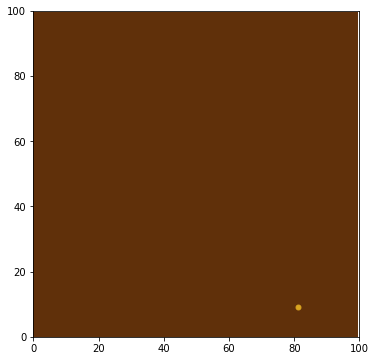

In [33]:
#Write your code here
d= random.random()
m= random.random()
Rat = Animal_Agent(sex="F")
Rat.set_allele(d,m)
RatRace = Environment()

RatRace.add_agent(Rat)

RatRace.simulate(50)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

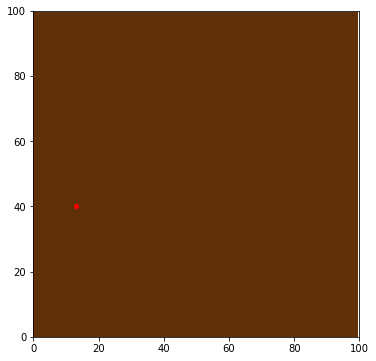

In [35]:
#Write your code here

d= random.random()
m= random.random()
Rat = Animal_Agent(sex="F")
Hawk = Animal_Agent(ptype="Predator",shape="P",color="red")
Rat.set_allele(d,m)
RatRace = Environment()

RatRace.add_agent(Rat)
RatRace.add_agent(Hawk)

RatRace.simulate(50)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

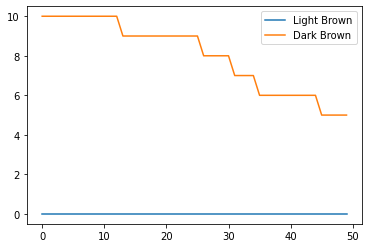

In [77]:
#Write your code here

d= random.random()
m= random.random()
Rat1 = Animal_Agent(sex="F",age_limit=1000)
Rat1.set_allele(d,m)
Hawk1 = Animal_Agent(ptype="Predator",shape="P",color="red")
Rat2 = Animal_Agent(sex="M")
Rat2.set_allele(d,m)
Hawk2 = Animal_Agent(ptype="Predator",shape="P",color="red")
Rat3 = Animal_Agent(sex="M",age_limit=1000)
Rat4 = Animal_Agent(sex="F",age_limit=1000)
Rat5 = Animal_Agent(sex="F",age_limit=1000)
Rat6 = Animal_Agent(sex="M",age_limit=1000)
Rat7 = Animal_Agent(sex="F",age_limit=1000)
Rat8 = Animal_Agent(sex="M",age_limit=1000)
Rat9 = Animal_Agent(sex="F",age_limit=1000)
Rat10 = Animal_Agent(sex="M",age_limit=1000)
Rat.set_allele(d,m)
RatRace = Environment()

RatRace.add_agent(Rat1)
RatRace.add_agent(Hawk1)
RatRace.add_agent(Rat2)
RatRace.add_agent(Hawk2)
RatRace.add_agent(Rat3)
RatRace.add_agent(Rat4)
RatRace.add_agent(Rat5)
RatRace.add_agent(Rat6)
RatRace.add_agent(Rat7)
RatRace.add_agent(Rat8)
RatRace.add_agent(Rat9)
RatRace.add_agent(Rat10)
#RatRace.simulate(50)

RatRace.simulate_plot_populations(50)


### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**

*It seems fairly periodic, the shape is irregular as the positions of the prey is random, so the shape will rise and fall as prey procreates/gets eaten. Also important to mention that as population reached carrying capacity, it can rise no higher. Light Brown and Dark Brown will rise/fall randomly since those characteristics are randomly decided.*

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [ ]:
#Write your code here

### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [ ]:
#Write your code here

### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

In [ ]:
#Write your code here

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

*Write your response below*

---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.